### Matplotlib



Es la biblioteca basica para graficar en python.

- Nos sirve para graficas simples y rapidas
- Es muy flexible
- Es la que vamos a usar constantemente

Vamos a crear de manera random los datos necesarios para el ejercicio.

- Let's simulate a scenario where increases in training hours correlate with a player's price.

In [1]:
import pandas as pd
import numpy as np

# Número de futbolistas
num_futbolistas = 400

# Generar datos aleatorios para cada columna
# Generamos las horas de entrenamiento
horas_entre = np.random.randint(5, 20, num_futbolistas)
data = {
    'Id': np.arange(1, num_futbolistas + 1),
    'Nombre': [f"Jugador {i}" for i in range(1, num_futbolistas + 1)],
    'Liga': np.random.randint(1, 4, num_futbolistas),  # Asumiendo 3 ligas
    'Prácticas': np.random.randint(1, 8, num_futbolistas),
    'Horas_Entrenando': horas_entre,
    # Altura en metros
    'Altura': np.random.uniform(1.60, 1.95, num_futbolistas),
    # El precio depende de las horas de entrenamiento
    'Precio': 100000 + (horas_entre * np.random.randint(50000, 100000, num_futbolistas)) + np.random.normal(0, 100000, num_futbolistas),
    'Juegos': np.random.randint(0, 40, num_futbolistas),
    'Gimnasio': np.random.choice(['Sí', 'No'], num_futbolistas),
    'Fuma': np.random.choice(['Sí', 'No'], num_futbolistas),
    'Nacimiento': pd.to_datetime(np.random.choice(pd.date_range('1990-01-01', '2003-12-31'), num_futbolistas)),
    'Nutriólogo': np.random.choice(['Sí', 'No'], num_futbolistas),
    'Horas_Casa': np.random.randint(5, 15, num_futbolistas)
}

# Crear el DataFrame
df_futbolistas = pd.DataFrame(data)

# Imprimir las primeras 5 filas del DataFrame para verificar
print(df_futbolistas.head())

# Imprimir información sobre el DataFrame (columnas y tipos de datos)
print(df_futbolistas.info())


# Export to Excel
df_futbolistas.to_excel("../db/futbolistas.xlsx", index=False)
print("DataFrame exported to futbolistas.xlsx ⚽")

   Id     Nombre  Liga  Prácticas  Horas_Entrenando    Altura        Precio  \
0   1  Jugador 1     2          6                 5  1.801013  6.901567e+05   
1   2  Jugador 2     2          1                15  1.623170  1.134086e+06   
2   3  Jugador 3     2          7                15  1.713289  9.612938e+05   
3   4  Jugador 4     3          3                19  1.704865  1.622507e+06   
4   5  Jugador 5     1          3                14  1.660944  1.289953e+06   

   Juegos Gimnasio Fuma Nacimiento Nutriólogo  Horas_Casa  
0      15       No   No 2000-07-08         No           8  
1      10       Sí   Sí 1998-01-23         Sí           9  
2       3       No   Sí 1993-04-21         Sí           7  
3      37       No   Sí 2002-02-17         Sí           8  
4       6       Sí   Sí 1995-04-15         No           9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  -

> Continuamos con el ejercicio ahora con el excel generado como si fuera la fuente de datos original.

Lee el archivo de excel llamado 'futbolistas.xlsx' desde la carpeta 'db', estableciendo la columna 'Id' como index y parseando la columna 'Nacimiento' como fecha.

In [2]:
futbolistas = pd.read_excel(
    '../db/futbolistas.xlsx', index_col='Id', parse_dates=['Nacimiento'])
futbolistas

,Nombre,Liga,Prácticas,Horas_Entrenando,Altura,Precio,Juegos,Gimnasio,Fuma,Nacimiento,Nutriólogo,Horas_Casa
Id,,,,,,,,,,,,
1,Jugador 1,2,6,5,1.801013,6.901567e+05,15,No,No,2000-07-08,No,8
2,Jugador 2,2,1,15,1.623170,1.134086e+06,10,Sí,Sí,1998-01-23,Sí,9
3,Jugador 3,2,7,15,1.713289,9.612938e+05,3,No,Sí,1993-04-21,Sí,7
4,Jugador 4,3,3,19,1.704865,1.622507e+06,37,No,Sí,2002-02-17,Sí,8
5,Jugador 5,1,3,14,1.660944,1.289953e+06,6,Sí,Sí,1995-04-15,No,9
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Jugador 396,2,7,9,1.944044,9.167777e+05,17,No,No,1990-04-22,Sí,14
397,Jugador 397,3,7,9,1.747065,8.651895e+05,12,No,Sí,2000-10-25,No,12
398,Jugador 398,2,2,7,1.807829,3.736338e+05,31,No,No,1998-05-27,Sí,10


Crea un gráfico de dispersion con las "horas de entrenamiento" en el eje x y el "precio" en el eje y

<Axes: xlabel='Horas_Entrenando', ylabel='Precio'>

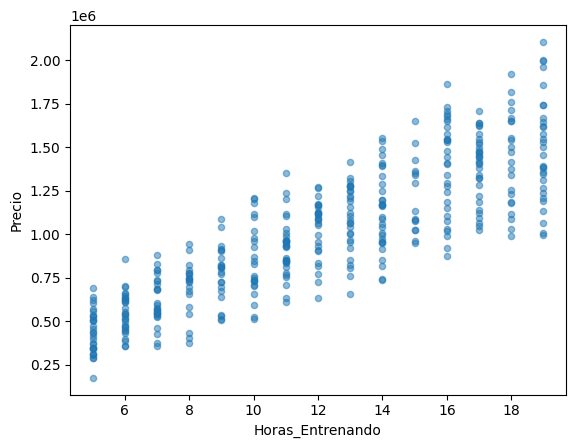

In [3]:
futbolistas.plot.scatter(x='Horas_Entrenando', y='Precio', alpha=0.5)
# scatter plot -> gráfico de dispersión

Crea un gráfico de pastel con la distribución de jugadores por liga

In [4]:
ligas = futbolistas.groupby(by='Liga').size()
ligas

Liga
1    151
2    129
3    120
dtype: int64

<Axes: >

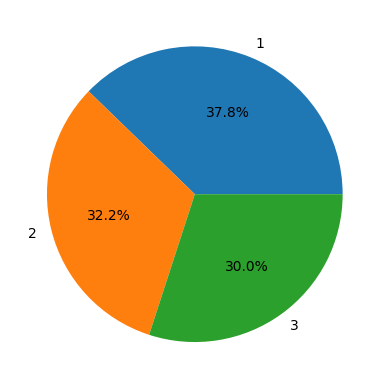

In [5]:
ligas.plot.pie(y='Liga', autopct='%1.1f%%')

Crea una tabla pivote con las horas de entrenamiento según las practicas y si fuma o no